In [1]:
# 图像分析与理解
# 图像配准实验 - 透视变换
# 东南大学，卓旭，212138

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from helper import display, readImageUint8

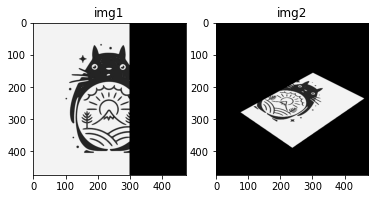

In [3]:
img1 = readImageUint8('img_1.txt')
img2 = readImageUint8('img_2.txt')
plt.figure()
plt.subplot(121); display(img1, 'img1')
plt.subplot(122); display(img2, 'img2')
plt.show()

In [4]:
FeaturePointsImg1 = [
    (73, 190), (73, 279), (135, 192), (135, 280), (277, 167), (317, 287),
    (403, 160), (403, 282), (217, 235), (303, 234), (383, 244), (345, 230)
]
FeaturePointsImg2 = [
    (183, 288), (205, 330), (199, 262), (221, 303), (228, 184), (274, 221),
    (262, 118), (299, 175), (231, 243), (254, 202), (281, 167), (265, 181)
]

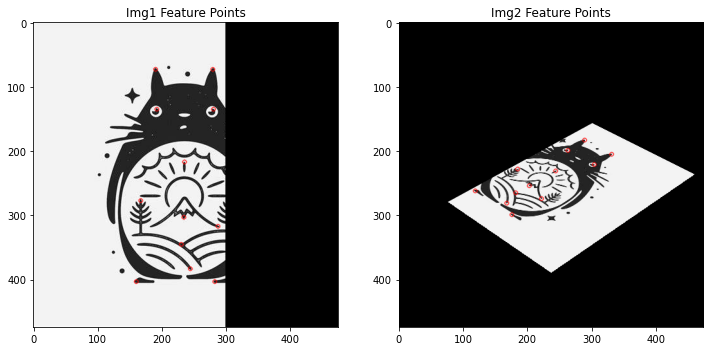

In [5]:
def makeKeypoint(r, c):
    p = cv2.KeyPoint(); p.pt = (c, r)
    return p

plt.figure(figsize=(12, 8))
plt.subplot(121)
display(
    cv2.drawKeypoints(img1.astype(np.uint8), [makeKeypoint(*arg) for arg in FeaturePointsImg1], None, color=(255, 0, 0)), 
    'Img1 Feature Points'
)
plt.subplot(122)
display(
    cv2.drawKeypoints(img2.astype(np.uint8), [makeKeypoint(*arg) for arg in FeaturePointsImg2], None, color=(255, 0, 0)), 
    'Img2 Feature Points'
)
plt.show()

In [10]:
A1 = [ [ [a[0], a[1], 1], [0, 0, 0] ] for a in FeaturePointsImg2 ]
A1 = np.array(A1).reshape((-1, 3))
A2 = np.roll(A1, 1, axis=0)
A3 = [ [ [-a[0]*b[0], -a[1]*b[0]], [-a[0]*b[1], -a[1]*b[1]] ] for (a, b) in zip(FeaturePointsImg2, FeaturePointsImg1) ]
A3 = np.array(A3).reshape((-1, 2))
A = np.hstack((A1, A2, A3))
A.shape

(24, 8)

In [13]:
rhs = [ [b[0], b[1]] for b in FeaturePointsImg1 ]
rhs = np.array(rhs).reshape((-1))
rhs.shape

(24,)

In [17]:
p = (np.linalg.inv(A.T @ A) @ A.T) @ rhs
p

array([ 1.78618194e+00, -1.07304042e+00,  6.24174078e+01,  1.80851482e+00,
        1.05527867e+00, -4.40601013e+02, -2.52605120e-05,  3.17646451e-05])

In [18]:
P = np.array([*p, 1]).reshape(3, 3)
P

array([[ 1.78618194e+00, -1.07304042e+00,  6.24174078e+01],
       [ 1.80851482e+00,  1.05527867e+00, -4.40601013e+02],
       [-2.52605120e-05,  3.17646451e-05,  1.00000000e+00]])

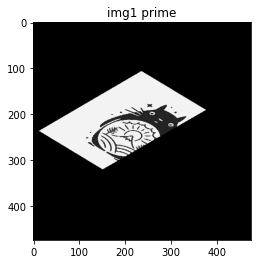

In [23]:
h, w = img1.shape
img1Prime = np.zeros_like(img1)
for i in range(h):
    for j in range(w):
        coord = P @ np.array([i, j, 1], dtype=np.float32)
        coord /= coord[-1]
        x1, y1, _ = np.round(coord).astype(np.int32)
        if x1 >= 0 and x1 < h and y1 >= 0 and y1 < w:
            img1Prime[i, j] = img1[x1, y1]
            
plt.figure()
display(img1Prime, 'img1 prime')
plt.show()

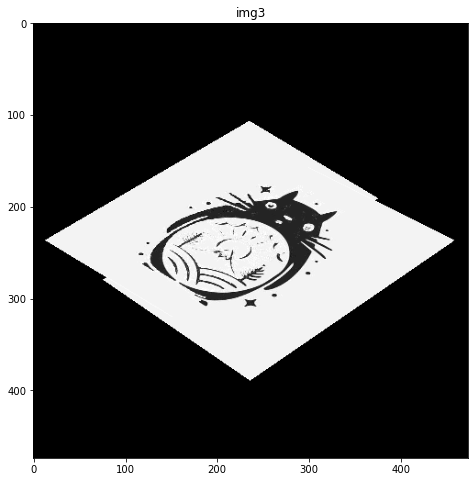

In [26]:
img3 = np.maximum(img1Prime, img2)
plt.figure(figsize=(8, 8))
display(img3, 'img3')
plt.show()